# Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline

## Importing dataset

In [2]:
Adult = pd.read_csv('~/Desktop//Northeastern/Quarter 5/ALY 6020/Module 1/Assignment/adult-all.csv', names=['age','workclass','fnlwgt (ignore)','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary'])

## Checking first few records

In [3]:
Adult.head(5)

,age,workclass,fnlwgt (ignore),education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Checking datatypes of columns

In [4]:
Adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt (ignore)  48842 non-null  int64 
 3   education        48842 non-null  object
 4   education-num    48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   sex              48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  Salary           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Check number of rows and columns

In [5]:
Adult.shape

(48842, 15)

## Rows containing duplicate data

In [6]:
duplicate_rows_df = Adult[Adult.duplicated()]
print("duplicate rows: ", duplicate_rows_df.shape)

duplicate rows:  (52, 15)


## Drop records with duplicate data

In [7]:
Adult.drop_duplicates(keep=False,inplace=True)

## Checking summary statistics of data

In [8]:
Adult.describe()

,age,fnlwgt (ignore),education-num,capital-gain,capital-loss,hours-per-week
count,48741.000000,4.874100e+04,48741.000000,48741.000000,48741.000000,48741.000000
mean,38.661107,1.896775e+05,10.079235,1081.303646,87.683634,40.429577
std,13.706556,1.056289e+05,2.569661,7459.574110,403.402187,12.393710
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175560e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781370e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.375810e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Checking frequency distribution of columns

In [9]:
cat_names=['workclass','education','marital-status','occupation','relationship','race','sex','native-country','Salary']

for i in cat_names:
 
 print(Adult[i].value_counts())
 print("\n")

Private             33817
Self-emp-not-inc     3860
Local-gov            3136
?                    2791
State-gov            1981
Self-emp-inc         1693
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


HS-grad         15756
Some-college    10848
Bachelors        8002
Masters          2655
Assoc-voc        2059
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           953
Prof-school       834
9th               756
12th              653
Doctorate         594
5th-6th           505
1st-4th           244
Preschool          80
Name: education, dtype: int64


Married-civ-spouse       22353
Never-married            16050
Divorced                  6627
Separated                 1530
Widowed                   1518
Married-spouse-absent      626
Married-AF-spouse           37
Name: marital-status, dtype: int64


Prof-specialty       6158
Craft-repair         6093
Exec-managerial      6078
Adm-clerical      

## Replacing columns with ? values with NA

In [10]:
col_names=['workclass','occupation','native-country']

#Replace ? with NULL values
for col in col_names:
    
    Adult[col].replace('?', np.NaN, inplace=True) 
    

## Replace null values in categorical variables with mode

In [11]:
Adult['workclass'].fillna(Adult['workclass'].mode()[0], inplace=True)
Adult['occupation'].fillna(Adult['occupation'].mode()[0], inplace=True)
Adult['native-country'].fillna(Adult['native-country'].mode()[0], inplace=True)

## Checking for outliers through boxplots

<AxesSubplot:xlabel='age'>

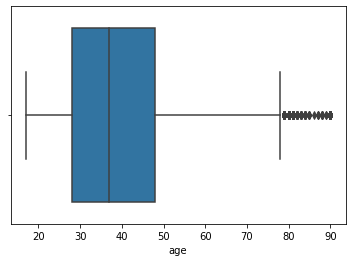

In [12]:
# Age Boxplot
# boxplot = Adult.boxplot(column=['age'])
# plt.figure(figsize=(8,6))
# sns.histplot(Adult['age'],kde=True,color='r')
# plt.ylabel('No. of Individuals')
sns.boxplot(Adult['age'])


<AxesSubplot:xlabel='education-num'>

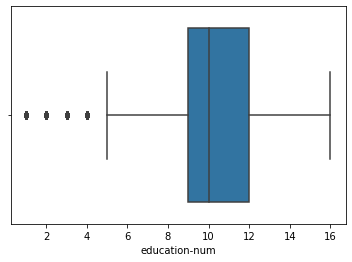

In [13]:
# boxplot = Adult.boxplot(column=['education-num'])
# plt.figure(figsize=(8,6))
# sns.histplot(Adult['education-num'],kde=True,color='r')
# plt.ylabel('No. of Individuals')
sns.boxplot(Adult['education-num'])


<AxesSubplot:xlabel='capital-gain'>

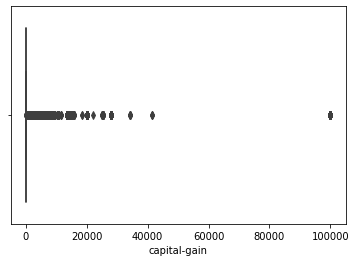

In [14]:
# boxplot = Adult.boxplot(column=['capital-gain'])
# plt.figure(figsize=(8,6))
# sns.histplot(Adult['capital-gain'],kde=True,color='r')
# plt.ylabel('No. of Individuals')
sns.boxplot(Adult['capital-gain'])


<AxesSubplot:xlabel='capital-loss'>

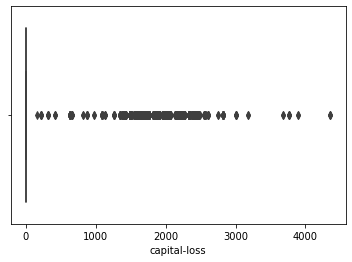

In [15]:
# boxplot = Adult.boxplot(column=['capital-loss'])
# plt.figure(figsize=(8,6))
# sns.histplot(Adult['capital-loss'],kde=True,color='r')
# plt.ylabel('No. of Individuals')
sns.boxplot(Adult['capital-loss'])


<AxesSubplot:xlabel='hours-per-week'>

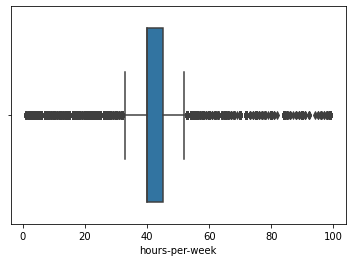

In [16]:
# boxplot = Adult.boxplot(column=['hours-per-week'])
# plt.figure(figsize=(8,6))
# sns.histplot(Adult['hours-per-week'],kde=True,color='r')
# plt.ylabel('No. of Individuals')
sns.boxplot(Adult['hours-per-week'])


## Checking distribution of target variable

<=50K    0.760469
>50K     0.239531
Name: Salary, dtype: float64

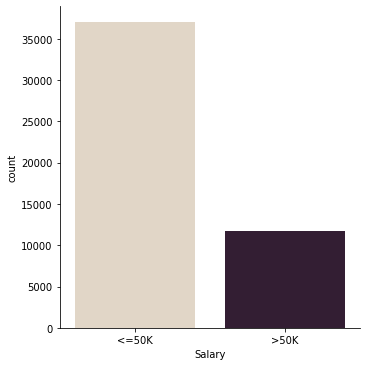

In [17]:
sns.catplot(x="Salary", kind="count", palette="ch:.25", data=Adult)
Adult.Salary.value_counts() / len(Adult)

## Which working class has more people earning more than 50k?

<module 'matplotlib.pyplot' from '/Users/dhanashreerajendrachavan/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

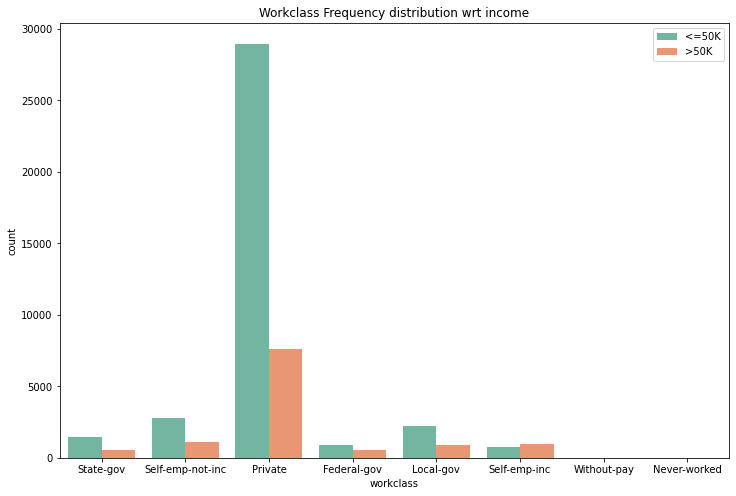

In [18]:
#Workplace    
f, ax = plt.subplots(figsize=(12, 8))
sn = sns.countplot(x="workclass", hue="Salary", data=Adult, palette="Set2")
sn.set_title("Workclass Frequency distribution wrt income")
sn.legend(loc='upper right')
plt

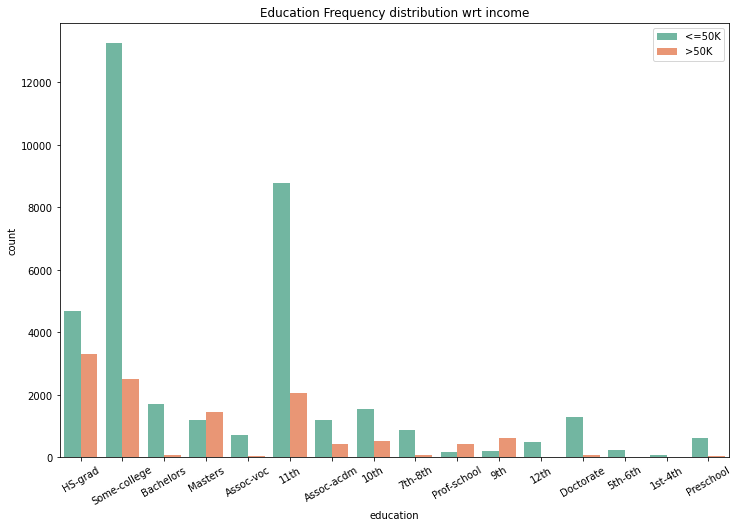

In [19]:
#Education
f, ax = plt.subplots(figsize=(12, 8))
sn = sns.countplot(x="education", hue="Salary", data=Adult, palette="Set2")
sn.set_title("Education Frequency distribution wrt income")
sn.set_xticklabels(Adult.education.value_counts().index, rotation=30)
sn.legend(loc='upper right')
plt.show()

## People belonging to which marital status earns highest in terms of income more than 50k?

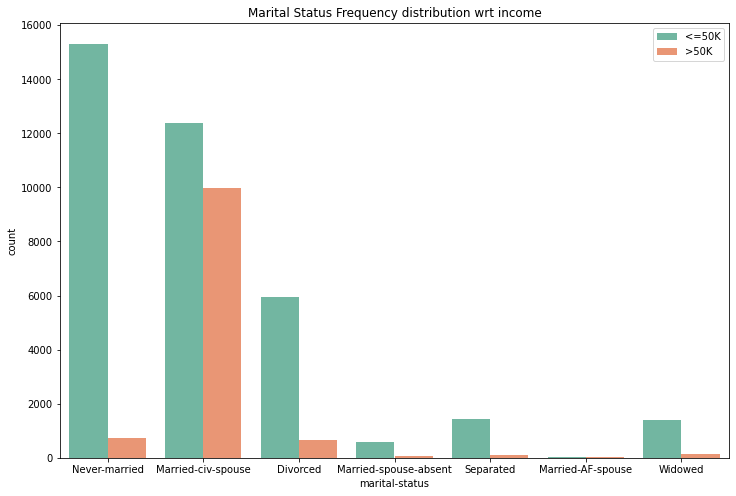

In [20]:
#Marital Status
f, ax = plt.subplots(figsize=(12, 8))
sn = sns.countplot(x="marital-status", hue="Salary", data=Adult, palette="Set2")
sn.set_title("Marital Status Frequency distribution wrt income")
sn.legend(loc='upper right')
plt.show()

## People belonging to which occupation earns highest in terms of income more than 50k?

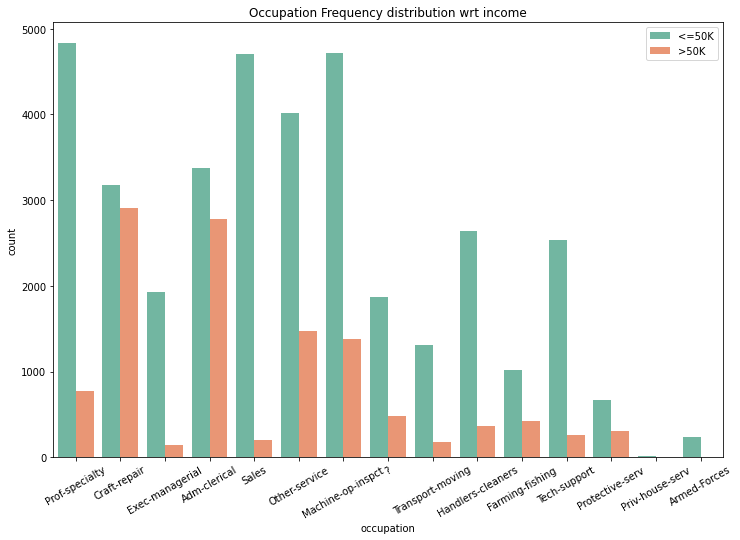

In [21]:
#Occupation
f, ax = plt.subplots(figsize=(12, 8))
sn = sns.countplot(x="occupation", hue="Salary", data=Adult, palette="Set2")
sn.set_title("Occupation Frequency distribution wrt income")
sn.set_xticklabels(Adult.occupation.value_counts().index, rotation=30)
sn.legend(loc='upper right')
plt.show()


## People belonging to which race earns highest in terms of income more than 50k?

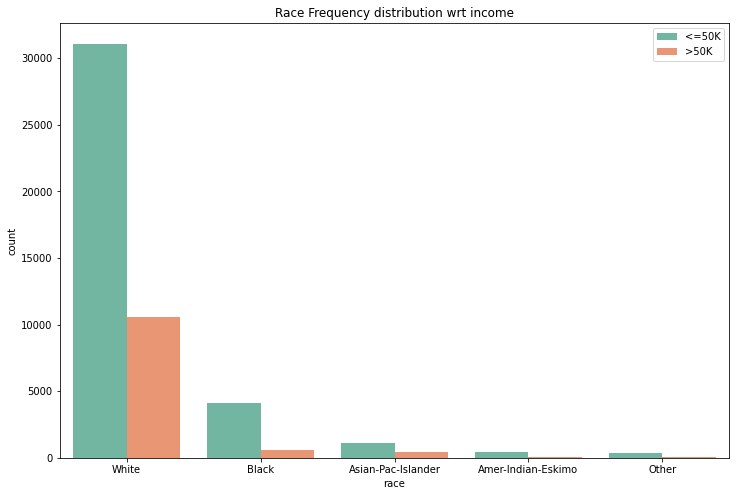

In [22]:
#race
f, ax = plt.subplots(figsize=(12, 8))
sn = sns.countplot(x="race", hue="Salary", data=Adult, palette="Set2")
sn.set_title("Race Frequency distribution wrt income")
sn.legend(loc='upper right')
plt.show()

## People belonging to which gender earns highest in terms of income more than 50k?

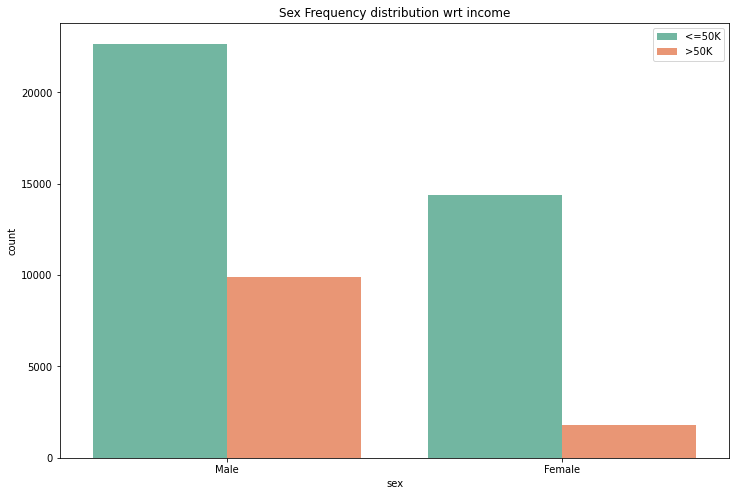

In [23]:
#sex
f, ax = plt.subplots(figsize=(12, 8))
sn = sns.countplot(x="sex", hue="Salary", data=Adult, palette="Set2")
sn.set_title("Sex Frequency distribution wrt income")
sn.legend(loc='upper right')
plt.show()

## Relationship between age and income

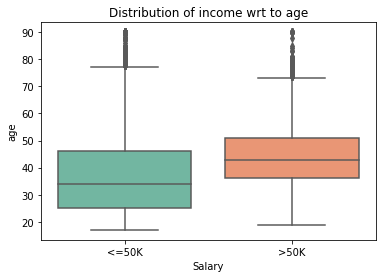

In [24]:
sn = sns.boxplot(x="Salary", y="age", data=Adult, palette="Set2")
sn.set_title("Distribution of income wrt to age")
plt.show()

## Encoding target variable

In [25]:
Adult['Salary']=Adult['Salary'].map({'<=50K': 0, '>50K': 1})

# Feature Engineering

No handles with labels found to put in legend.


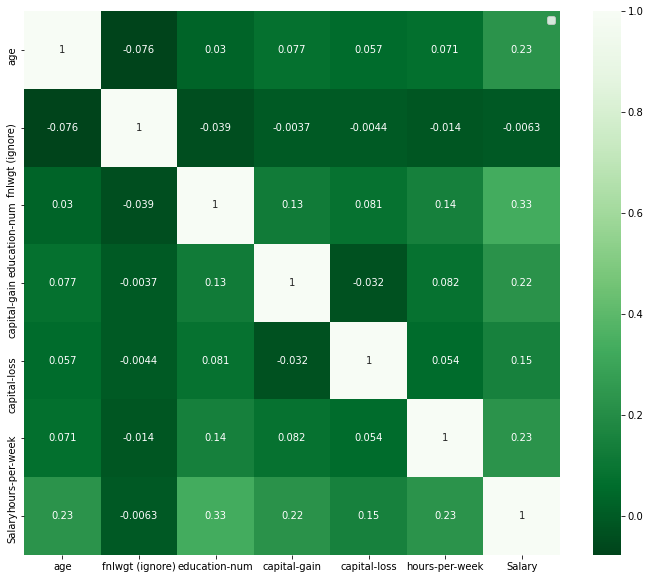

In [26]:
#Co-relation Matrix
plt.figure(figsize = (12,10))
sns.heatmap(Adult.corr(), cmap = 'Greens_r', annot = True)
plt.legend(fontsize=10)

## As marital status feature is already there no need for relationship status hence dropped it

In [29]:
#Declare feature vector and target variable
X = Adult.drop(['relationship','Salary','fnlwgt (ignore)','education-num'], axis=1)
y = Adult['Salary']

## One hot encoded categorical variables

In [31]:
X = pd.get_dummies(X, columns=['workclass', 'education', 'marital-status','occupation','race','sex','native-country'], drop_first=True)

In [32]:
cat_variables = X.drop(['age','capital-gain','capital-loss','hours-per-week'], axis=1)

In [33]:
X

,age,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,2174,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,0,0,13,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,0,0,36,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,64,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,38,0,0,50,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,44,5455,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Selecting categorical variables which would most significantly help to predict target variable

In [39]:
# Select from categorical variables
from sklearn.feature_selection import SelectKBest, chi2  # for chi-squared feature selection

#k indicates how many top features to select, here we are using all features and later chose significant variables using the test scores.
sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(cat_variables, y)

# plot the scores from highest to lowest
datset = pd.DataFrame()

In [40]:
pd.set_option('display.max_rows', None)

In [36]:
sns.set(rc={'figure.figsize':(19,35)})

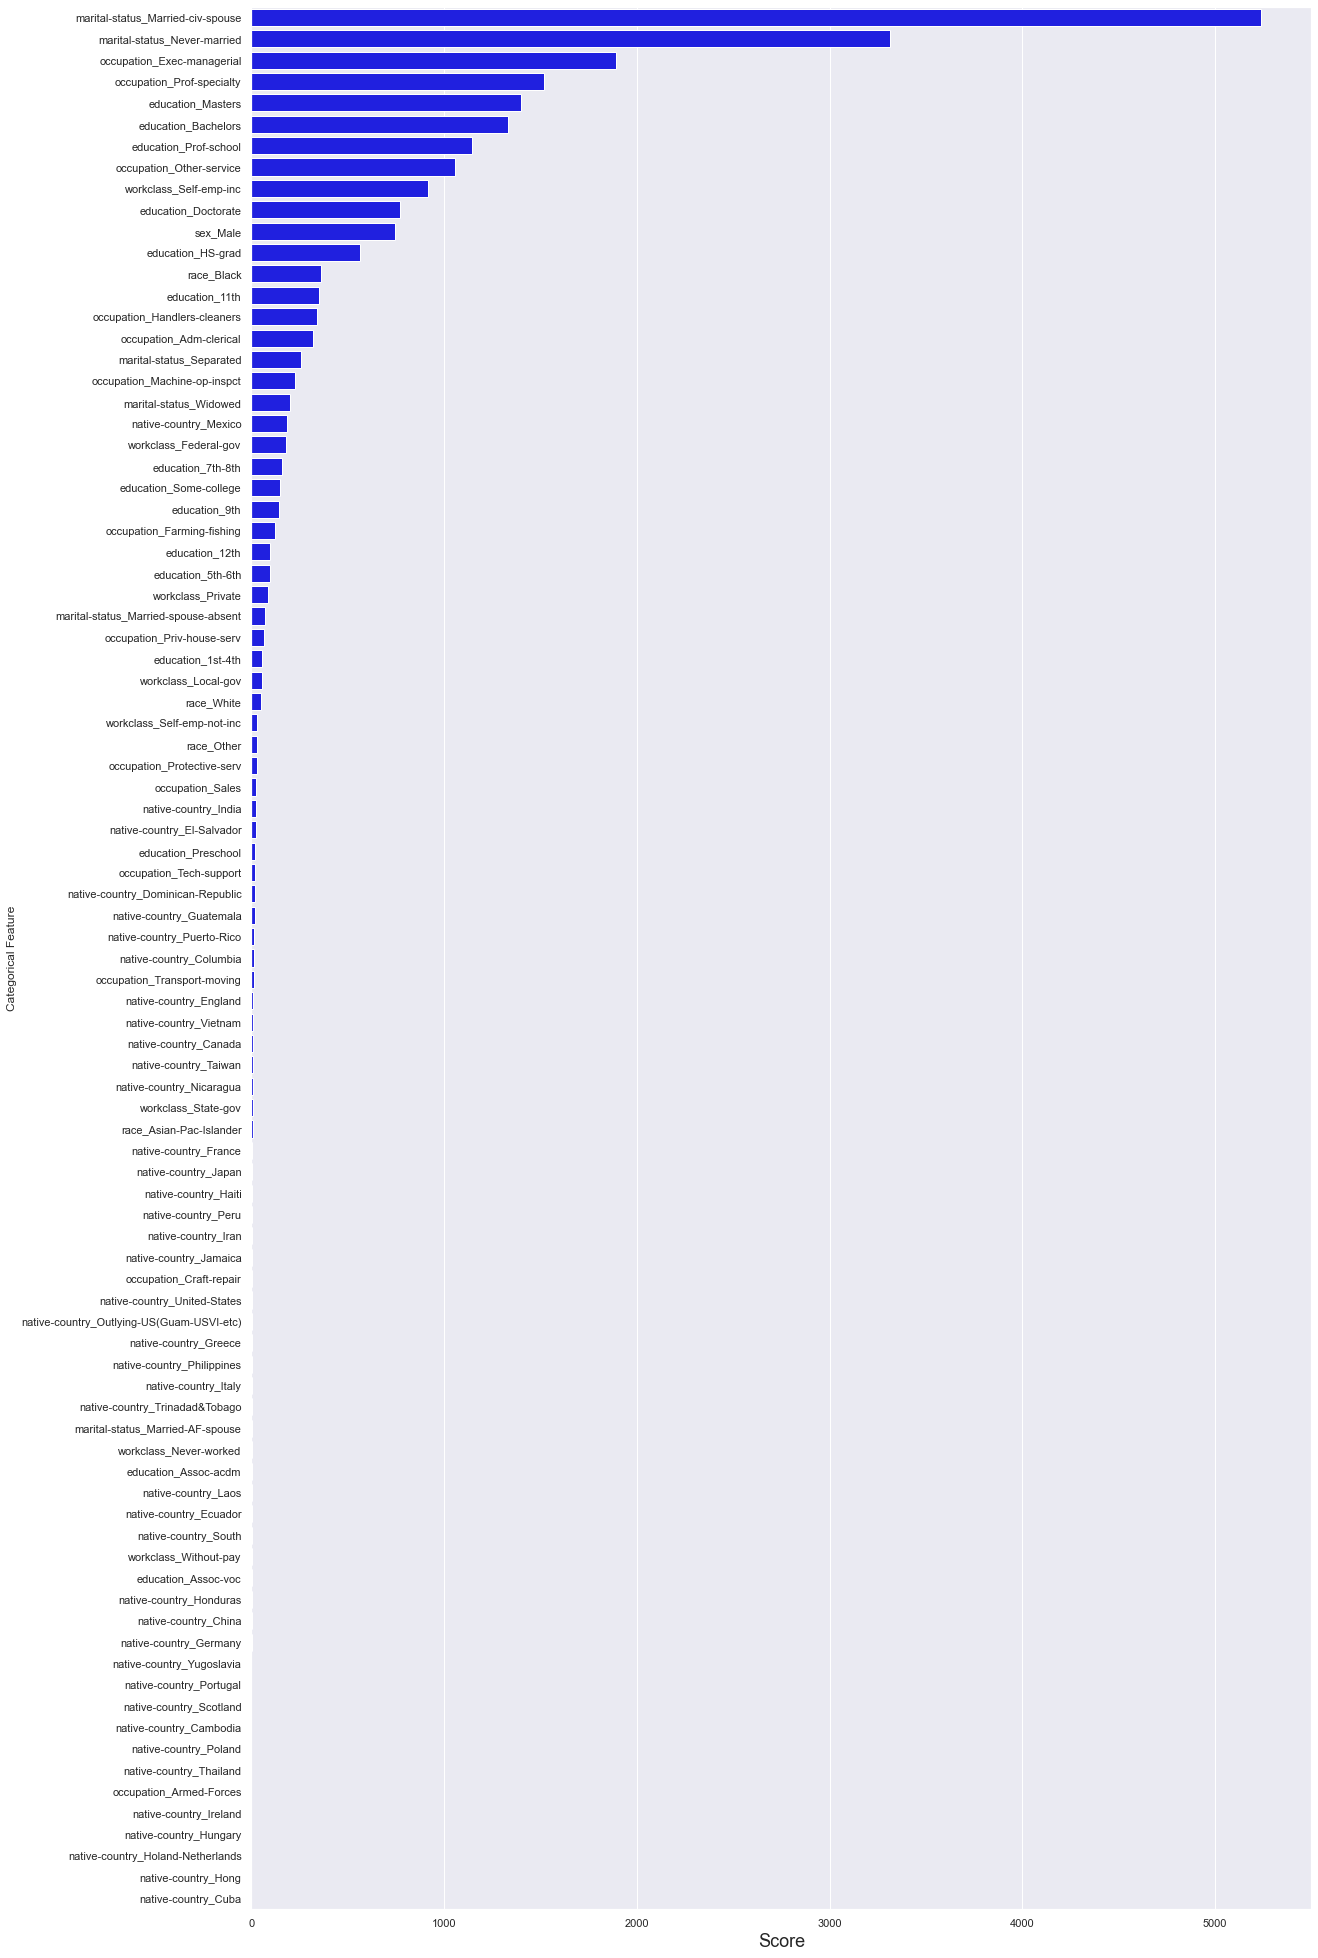

In [37]:
datset['feature'] = cat_variables.columns[range(len(sf_fit.scores_))]
datset['scores'] = sf_fit.scores_
datset = datset.sort_values(by='scores', ascending=False)
sns.set()
sns.barplot(datset['scores'], datset['feature'], color='blue')
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature')
plt.xlabel('Score', fontsize=18)
plt.show()

In [38]:
datset.sort_values(by=['scores'], ascending=False)

,feature,scores
24,marital-status_Married-civ-spouse,5236.994780
26,marital-status_Never-married,3311.425326
32,occupation_Exec-managerial,1894.129001
38,occupation_Prof-specialty,1518.150144
19,education_Masters,1400.676942
16,education_Bachelors,1329.855568
21,education_Prof-school,1145.890067
36,occupation_Other-service,1058.091826
4,workclass_Self-emp-inc,919.379966
17,education_Doctorate,770.404096


In [41]:
X = X[['age','capital-gain','capital-loss','hours-per-week','marital-status_Married-civ-spouse','marital-status_Never-married','occupation_Exec-managerial','education_Masters','education_Bachelors','education_Prof-school','occupation_Other-service','workclass_Self-emp-inc','education_Doctorate','sex_Male','education_HS-grad','occupation_Prof-specialty','race_Black','education_11th','occupation_Handlers-cleaners','marital-status_Separated','occupation_Machine-op-inspct','marital-status_Widowed','workclass_Private','native-country_Mexico','education_7th-8th','education_Some-college','education_9th','occupation_Farming-fishing']]

In [42]:
#X = X.join([workclass,education,marital_status,occupation,race,sex,native_country])

In [43]:
#X = X.drop(['workclass','education','marital-status','occupation','race','sex','native-country'], axis=1)

# Train-Test Split

In [44]:
#Splitting data into separate training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 111)

In [45]:
# check the shape of X_train and X_test
X_train.shape
X_test.shape

(9749, 28)

## Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Model Building

In [47]:
# Testing results for a set of K values
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.15550312852600268 at K = 23


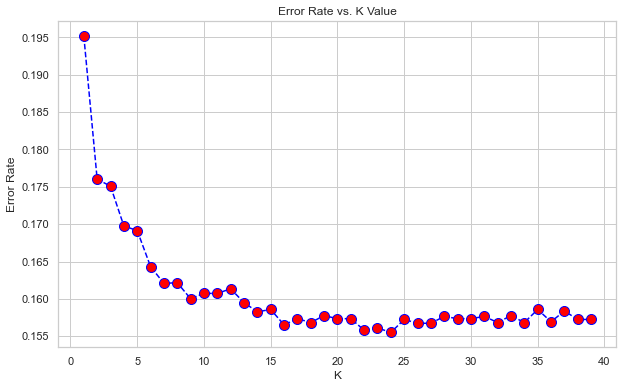

In [48]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.8444968714739973 at K = 23


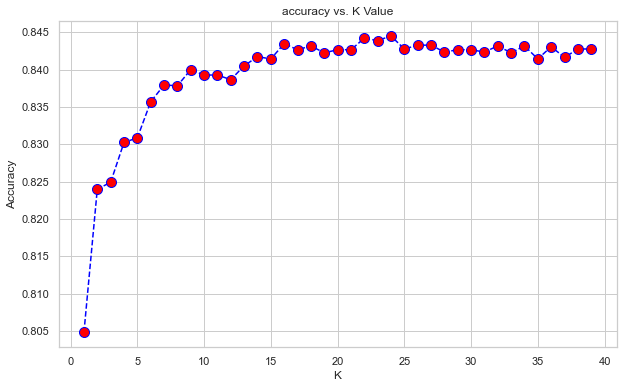

In [49]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [50]:
neigh = KNeighborsClassifier(n_neighbors = 23).fit(X_train,y_train)
yhat = neigh.predict(X_test)
acc.append(metrics.accuracy_score(y_test, yhat))

## Checking accuracy of model

In [52]:
#Check accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score

acc_dt = metrics.accuracy_score(yhat,y_test)
print('The accuracy of the KNN is', acc_dt)

The accuracy of the KNN is 0.8438814237357678


In [53]:
# Compute confusion matrix
cm = confusion_matrix(y_test, yhat)
cm

array([[6883,  556],
       [ 966, 1344]])

In [55]:
pd.crosstab(y_test, yhat, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,6883,556,7439
1,966,1344,2310
All,7849,1900,9749
